# **미니프로젝트 4차 1대1 문의 내용 유형 분류기**
# 단계1 : 데이터 탐색

### 문제 정의
> 1:1 문의 내용 분류 문제<br>
> 1. 문의 내용 분석
> 2. 문의 내용 분류 모델 성능 평가
### 학습 데이터
> * 1:1 문의 내용 데이터 : train.csv

### 변수 소개
> * text : 문의 내용
> * label : 문의 유형

### References
> * 한국어 처리
>> * [konlpy - 한국어 처리 라이브러리](https://konlpy.org/ko/latest/)
>> * [한국어 품사 태그 비교표](https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0)
>> * [한국어 품사 태깅 성능 비교](https://konlpy.org/ko/latest/morph/#comparison-between-pos-tagging-classes)
>> * [한국어 시스템 사전](https://konlpy.org/ko/latest/data/#corpora)

> * 자연어 처리
>> * [NLTK](https://www.nltk.org/book/)
>> * [gensim](https://radimrehurek.com/gensim/)
>> * [Google guide](https://developers.google.com/machine-learning/guides/text-classification/step-2)
>> * [WordCloud](https://amueller.github.io/word_cloud/)

## 1. 개발 환경 설정

* 세부 요구사항
  - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
  - 필요하다고 판단되는 라이브러리를 추가하세요.
  - konlpy, mecab 설치 후 형태소 분석 함수 생성
  - mecab 설치할 때 윈도우 pc에서 설치는 다른 방법으로 진행
  - 윈도우 환경일 경우 KoNLPy의 라이브러리 설치가 제대로 이루어지지 않을 수 있습니다
  - 윈도우 설치를 위한 참고 링크
    - https://liveyourit.tistory.com/56

### 1-1. 라이브러리 설치

In [111]:
# 필요 라이브러리부터 설치할께요.
!pip install konlpy pandas seaborn gensim wordcloud python-mecab-ko wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 1-2. 라이브러리 import

In [112]:
from mecab import MeCab
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from wordcloud import WordCloud
from collections import Counter
import wget, os

### 1-3. 한글 글꼴 설정(Windows)

In [3]:
# if not os.path.exists("malgun.ttf"): 
#     wget.download("https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf")
# if 'malgun' not in fm.fontManager.findfont("Malgun Gothic"):
#     fm.fontManager.addfont("malgun.ttf")
# if plt.rcParams['font.family']!= ["Malgun Gothic"]:
#     plt.rcParams['font.family']= [font for font in fm.fontManager.ttflist if 'malgun.ttf' in font.fname][-1].name
# plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
# assert plt.rcParams['font.family'] == ["Malgun Gothic"], "한글 폰트가 설정되지 않았습니다."
# FONT_PATH = "malgun.ttf"

### 1-4. 자바 경로 설정(Windows)

In [4]:
# os.environ['JAVA_HOME'] = "C:\Program Files\Java\jdk-19"

### 1-3. 한글 글꼴 설정(Colab)

In [113]:
!sudo apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [114]:
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=FONT_PATH, size=10).get_name()
fm.fontManager.addfont(FONT_PATH)
print(font_name)

plt.rcParams['font.family']=font_name
assert plt.rcParams['font.family'] == [font_name], "한글 폰트가 설정되지 않았습니다."

NanumGothic


### 1-4. 구글드라이브 연결(Colab)

In [115]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2.데이터 불러오기

* 주어진 데이터
 - 학습 및 검증용 데이터 : train.csv

### 2-1. 데이터 로딩

* 다음 데이터를 불러옵니다.
    * 학습 및 검증용 데이터 : train.csv
    * shape를 확인합니다.

In [116]:
path = "/content/drive/MyDrive/13 Mini Project04/train.csv"
data = pd.read_csv(path)

In [117]:
data.head()

,text,label
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",코드2
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,웹
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,코드2
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",코드2
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,코드2


In [10]:
data.shape

(3706, 2)

### 2-2. 데이터 확인하기
* 문의 유형 분포 확인
* data type, 결측치 확인

In [11]:
# data type 및 결측치 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3706 entries, 0 to 3705
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3706 non-null   object
 1   label   3706 non-null   object
dtypes: object(2)
memory usage: 58.0+ KB


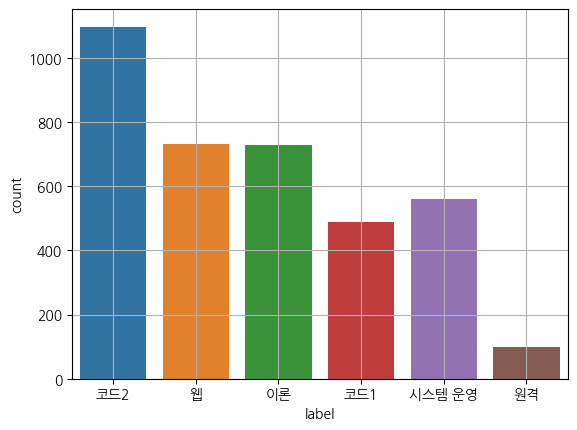

In [12]:
# 문의 유형 분포 확인
sns.countplot(x=data['label'])
plt.grid()
plt.show()

## 3.데이터 탐색하기


### 3-1. 문의 내용 길이 분포

* 문의 내용의 길이 분포를 확인합니다.
* 최소, 최대 길이의 index 및 문의 내용을 확인합니다.

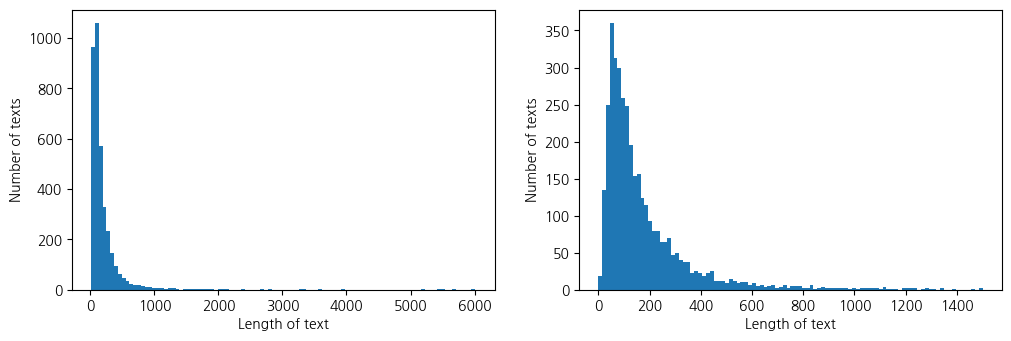

In [13]:
# 문의 내용 길이 분포 확인
plt.figure(figsize=(12, 8))

# 전체 분포 확인
plt.subplot(2, 2, 1)
plt.hist([len(s) for s in  data['text']], bins=100)
plt.xlabel('Length of text')
plt.ylabel('Number of texts')

# 0 - 1500 분포 확인
plt.subplot(2, 2, 2)
plt.hist([len(s) for s in  data['text']], range=(0, 1500), bins=100)
plt.xlabel('Length of text')
plt.ylabel('Number of texts')

plt.show()

In [14]:
# 최소, 최대 길이의 index 및 문의 내용을 확인
texts_len = [len(s) for s in data['text']]

min_len_text = np.argmin(texts_len)
max_len_text = np.argmax(texts_len)

print(f'최소 길이의 index : {min_len_text}')
print(data['text'][min_len_text])
print('-' * 50)
print(f'최대 길이의 index : {max_len_text}')
print(data['text'][max_len_text])

최소 길이의 index : 756
원격 부탁드립니다
--------------------------------------------------
최대 길이의 index : 2561
sns.kdeplot(x = td[var])
plt.show()

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
 in 
----&gt; 1 sns.kdeplot(x = td[var])
      2 plt.show()

~\anaconda3\lib\site-packages\seaborn\_decorators.py in inner_f(*args, **kwargs)
     44             )
     45         kwargs.update({k: arg for k, arg in zip(sig.parameters, args)})
---&gt; 46         return f(**kwargs)
     47     return inner_f
     48 

~\anaconda3\lib\site-packages\seaborn\distributions.py in kdeplot(x, y, shade, vertical, kernel, bw, gridsize, cut, clip, legend, cumulative, shade_lowest, cbar, cbar_ax, cbar_kws, ax, weights, hue, palette, hue_order, hue_norm, multiple, common_norm, common_grid, levels, thresh, bw_method, bw_adjust, log_scale, color, fill, data, data2, warn_singular, **kwargs)
   1768             plot_kw

### 3-2. 명사 추출하고 품사 태깅하기

* konlpy, MeCab을 활용하여 품사 태깅, 명사 추출하기.
* 2개 이상의 형태소 분석기를 Time analysis 해보기
* Number of Samples / Number of words per sample 구해보기

In [15]:
from konlpy.tag import Kkma, Komoran
from mecab import MeCab
import time

* Kkma

In [16]:
kkma = Kkma()

In [17]:
# 명사 추출
st = time.time()

kkma_nouns = [kkma.nouns(s) for s in data['text']]

kkma_nouns_t = time.time() - st

In [18]:
print(kkma_nouns_t)

215.11556553840637


In [19]:
kkma_nouns[0]

['1', '2', '100', '여기', '사이즈', '은', '단어', '최대', '길이', '가정', '선언']

In [20]:
# 품사 태깅
st = time.time()

kkma_pos = [kkma.pos(s) for s in data['text']]

kkma_pos_t = time.time() - st

In [21]:
print(kkma_pos_t)

191.5529510974884


In [22]:
kkma_pos[0]

[('self', 'OL'),
 ('.', 'SF'),
 ('convs', 'OL'),
 ('1', 'NR'),
 ('=', 'SW'),
 ('nn', 'OL'),
 ('.', 'SF'),
 ('ModuleList', 'OL'),
 ('(', 'SS'),
 ('[', 'SS'),
 ('nn', 'OL'),
 ('.', 'SF'),
 ('Conv', 'OL'),
 ('2', 'NR'),
 ('d', 'OL'),
 ('(', 'SS'),
 ('1', 'NR'),
 (',', 'SP'),
 ('Co', 'OL'),
 (',', 'SP'),
 ('(', 'SS'),
 ('K', 'OL'),
 (',', 'SP'),
 ('100', 'NR'),
 ('))', 'SW'),
 ('for', 'OL'),
 ('K', 'OL'),
 ('in', 'OL'),
 ('Ks', 'OL'),
 (']', 'SS'),
 (')', 'SS'),
 ('1', 'NR'),
 ('.', 'SF'),
 ('여기', 'NP'),
 ('서', 'JKM'),
 ('커', 'VV'),
 ('어', 'ECS'),
 ('넣', 'VV'),
 ('ㄹ', 'ETD'),
 ('사이즈', 'NNG'),
 ('K', 'OL'),
 (',', 'SP'),
 ('100', 'NR'),
 ('은', 'NNG'),
 ('한', 'MDN'),
 ('단어', 'NNG'),
 ('의', 'JKG'),
 ('최대', 'NNG'),
 ('길이', 'NNG'),
 ('가', 'JKS'),
 ('100', 'NR'),
 ('이', 'JKS'),
 ('넘', 'VV'),
 ('지', 'ECD'),
 ('않', 'VXV'),
 ('는다는', 'ETD'),
 ('가정', 'NNG'),
 ('으로', 'JKM'),
 ('그냥', 'MAG'),
 ('100', 'NR'),
 ('으로', 'JKM'),
 ('선언', 'NNG'),
 ('하', 'XSV'),
 ('ㄴ', 'ETD'),
 ('것', 'NNB'),
 ('이', 'VCP'),
 ('ㄴ

* MeCab

In [23]:
mecab = MeCab()

In [24]:
# 명사 추출
st = time.time()

mecab_nouns = [mecab.nouns(s) for s in data['text']]

mecab_nouns_t = time.time() - st

In [25]:
print(mecab_nouns_t)

3.067448139190674


In [26]:
mecab_nouns[0]

['여기', '커널', '사이즈', '은', '단어', '최대', '길이', '가정', '선언', '것']

In [27]:
# 품사 태깅
st = time.time()

mecab_pos = [mecab.pos(s) for s in data['text']]

mecab_pos_t = time.time() - st

In [28]:
print(mecab_pos_t)

4.724879503250122


In [29]:
mecab_pos[0]

[('self', 'SL'),
 ('.', 'SY'),
 ('convs', 'SL'),
 ('1', 'SN'),
 ('=', 'SY'),
 ('nn', 'SL'),
 ('.', 'SY'),
 ('ModuleList', 'SL'),
 ('(', 'SSO'),
 ('[', 'SSO'),
 ('nn', 'SL'),
 ('.', 'SY'),
 ('Conv', 'SL'),
 ('2', 'SN'),
 ('d', 'SL'),
 ('(', 'SSO'),
 ('1', 'SN'),
 (',', 'SC'),
 ('Co', 'SL'),
 (',', 'SC'),
 ('(', 'SSO'),
 ('K', 'SL'),
 (',', 'SC'),
 ('100', 'SN'),
 (')', 'SSC'),
 (')', 'SSC'),
 ('for', 'SL'),
 ('K', 'SL'),
 ('in', 'SL'),
 ('Ks', 'SL'),
 (']', 'SSC'),
 (')', 'SSC'),
 ('1', 'SN'),
 ('.', 'SF'),
 ('여기', 'NP'),
 ('서', 'JKB'),
 ('커널', 'NNG'),
 ('사이즈', 'NNG'),
 ('K', 'SL'),
 (',', 'SC'),
 ('100', 'SN'),
 ('은', 'NNG'),
 ('한', 'MM'),
 ('단어', 'NNG'),
 ('의', 'JKG'),
 ('최대', 'NNG'),
 ('길이', 'NNG'),
 ('가', 'JKS'),
 ('100', 'SN'),
 ('이', 'JKS'),
 ('넘', 'VV'),
 ('지', 'EC'),
 ('않', 'VX'),
 ('는다는', 'ETM'),
 ('가정', 'NNG'),
 ('으로', 'JKB'),
 ('그냥', 'MAG'),
 ('100', 'SN'),
 ('으로', 'JKB'),
 ('선언', 'NNG'),
 ('한', 'XSA+ETM'),
 ('것', 'NNB'),
 ('인지', 'VCP+EC'),
 ('궁금', 'XR'),
 ('합니다', 'XSA+EF'),


* Kkma, MeCab Time analysis

In [30]:
print(f'Kkma : {kkma_nouns_t} MeCab : {mecab_nouns_t}')
print(f'Kkma : {kkma_pos_t} MeCab : {mecab_pos_t}')

Kkma : 215.11556553840637 MeCab : 3.067448139190674
Kkma : 191.5529510974884 MeCab : 4.724879503250122


In [31]:
# Number of Samples / Number of words per sample
# = 총 text의 개수 / text의 평균 단어 수
number_of_samples = len(data['text'])
number_of_words_per_sample = np.array([len(n) for n in mecab_nouns])
number_of_words_per_sample_m = np.mean(number_of_words_per_sample)

print(f'number_of_samples : {number_of_samples}, number_of_words_per_sample : {number_of_words_per_sample_m}')
print(f'Number of Samples / Number of words per sample : {number_of_samples / number_of_words_per_sample_m}')

number_of_samples : 3706, number_of_words_per_sample : 15.387209929843497
Number of Samples / Number of words per sample : 240.84938185006575


### 3-3. nltk로 텍스트 분석하기
* 3-2.의 명사 추출, 품사 태깅한 데이터를 nltk Text로 변경하기
* 각각 token 갯수 / 전체 token 비율(Type-Token Ratio) 알아보기
* 각각 Frequency 확인 및 분포 시각화
* 명사 추출한 데이터에서 코드, 웹, 이론, 원격, 시스템 등 관심있는 각 단어에 분석해보기
* 각각 collocation 확인
* 최소 길이 문의 내용에 대해 grammar pasing 해보기(아래 코드 활용)


```python
grammar = """
NP: {<N.*>*<Suffix>?}   # Noun phrase
VP: {<V.*>*}            # Verb phrase
AP: {<A.*>*}            # Adjective phrase
"""
NP_grammar = "NP: {<Adjective>*<Noun>*}"
```

In [32]:
# 명사 추출한 데이터를 nltk Text로 변경하기
all_nouns = ""
for s in mecab_nouns:
    for n in s:
        all_nouns += n + ' '
all_nouns

'여기 커널 사이즈 은 단어 최대 길이 가정 선언 것 이미지 개 업로드 자바 스크립트 동적 폼 개 생성 데 클릭 뭘 수 기본 예제 코드 이유 뭘까요 사용 때 질문 포함 작동 것 질문 제공 파일 폴더 포함 폴더 안 정상 작동 오류 해결 안 폴더 안 이미지 저장 걸로 이해 실행 폴더 이미지 저장 질문 저 헬스 중 정신 건강 관심 디지털 치료제 관련 서비스 기획 기업 프로젝트 희망 보건복지부 정신 건강 관련 포털 운영 이 중심 문제 정의 파일 페이지 제 안사 인프라 구성 웹 서버 솔루션 대 통합 제시 때 배치도 작성 이중화 표현 작성 대로 통합 배치 걸까요 범주 데이터 숫자 데이터 설명 내용 적응 아래 첨부 파일 실습 데이터 서울시 릉 시간 비 데이터 저 데이터 범주 데이터 생각 제 의도 값 시간 대별 비 과 방법 사용 출력 의도 대로 질문 변량 분석 변량 분석 아래 가설 검증 방향 접근 방법 비 비 생각 첨부 파일 번 정답 코드 시 패스 출력 문제 요구 건 오답 경우 코드 것 웹 해킹 공부 리 큰따옴표 따옴표 백 슬래시 데이터베이스 전달 위험 걸 리 문장 를 으로 문자열 출력 프로그램 작성 제 생각 문제 요구 사항 다음 입력 문장 따옴표 따옴표 백 슬래시 요구 대로 입력 시 추가 수정 생각 조건 형태 인 경우 수정 문제 것 오타 확인 오타 해당 파일 확인 저 문제 걸까요 동일 이미지 마크 해당 이미지 파일 결 측 하나 경우 제외 열 열 결 측 행 제거 경우 결 측 하나 경우 제외 결 측 중복 열 제거 방법 윈도우 프롬프트 작업 중 이후 퍼블릭 연결 결과 도출 달 번 지원금 국민 카드 입금 사항 다음 연속 변수 존재 때 값 변수 상관 계수 값 값 데이터 평균 값 하나 대치 집계 상관 계수 상관 수라 말 수 건가요 이때 동일 값 분포 정규 분포 성립 가정 제 질문 혼란 듯 원질 문 와 이유 번 설명 부탁 감사 에서 해당 에러 타입 변경 에러 해당 에러 이유 위 테스트 데이터 전처리 과정 메시지 출력 이상 동작 제 말씀 건 실행 문제 때문 실행 답 문제 무엇 파악 범위

In [33]:
# 품사 태깅한 데이터를 nltk Text로 변경하기
all_pos = ""
for s in mecab_pos:
    for p in s:
        all_pos += p[0] + ' '
all_pos

'self . convs 1 = nn . ModuleList ( [ nn . Conv 2 d ( 1 , Co , ( K , 100 ) ) for K in Ks ] ) 1 . 여기 서 커널 사이즈 K , 100 은 한 단어 의 최대 길이 가 100 이 넘 지 않 는다는 가정 으로 그냥 100 으로 선언 한 것 인지 궁금 합니다 . 현재 이미지 를 여러 개 업로드 하 기 위해 자바 스크립트 로 동적 으로 폼 여러 개 생성 하 는 데 클릭 해도 생 성 이 안 되 네요 . .. 막혀서 뭘 할 수 가 없 네요 . . 혹시나 해서 기본 예제 코드 로 만 간단히 돌려도 안 됩니다 . 이유 가 뭘까요 glob . glob ( PATH ) 를 사용 할 때 질문 입니다 . PATH 에 [ ] 가 포함 되 면 제대로 작동 하 지 않 는 것 같 아 질문 드립니다 . 제공 해 주 신 파일 에 AIVLE _ 3 rd [ Team ] 폴더 가 포함 되 어 있 는데 , 이 폴더 안 에 는 glob 이 정상 적 으로 작동 하 지 않 습니다 . tmpp = tmp . groupby ( by = \' Addr 1 \', as _ index = False ) [ [ \' Category \']]. sum ( ) plt . figure ( figsize =( 15 , 5 ) ) plt . bar ( tmpp [ \' Addr 1 \'], tmpp [ \' Category \']/ 1000 ) plt . ticklabel _ format ( axis =\' y \', style =\' plain \') plt . show ( ) 오류 : unsupported operand type ( s ) for / : \' str \' and \' int \' 어떻 게 해결 하 면 좋 을까요 ? !!!! filename = TEST _ IMAGE + str ( round ( frame _ sec ) ) + ". jpg " 이렇게 하 면 test _ path 안 에 image 폴더 안 에 이미지 들 이 저장 되 

* [각각 token 갯수](https://datascienceschool.net/03%20machine%20learning/03.01.01%20NLTK%20%EC%9E%90%EC%97%B0%EC%96%B4%20%EC%B2%98%EB%A6%AC%20%ED%8C%A8%ED%82%A4%EC%A7%80.html)

In [34]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk import Text, FreqDist

In [35]:
retokenize = RegexpTokenizer("[\w]+")

In [36]:
# 각각 token 갯수 - nouns
nouns_token_counts = FreqDist(retokenize.tokenize(all_nouns))
nouns_token_counts

FreqDist({'것': 1093, '수': 986, '값': 801, '데이터': 783, '문제': 725, '때': 714, '코드': 712, '실습': 609, '번': 596, '파일': 581, ...})

In [37]:
# 각각 token 갯수 - pos
pos_token_counts = FreqDist(retokenize.tokenize(all_pos))
pos_token_counts

FreqDist({'_': 5490, '하': 5410, '는': 4475, '이': 4155, '을': 3729, '가': 3585, '를': 2982, '에': 2819, '1': 2483, '의': 2162, ...})

* [전체 token 비율(Type-Token Ratio) 알아보기](https://www.sltinfo.com/wp-content/uploads/2014/01/type-token-ratio.pdf)

In [38]:
# 전체 token 비율(Type-Token Ratio) 알아보기 - nouns
nouns_token_names = []
for n in nouns_token_counts:
    nouns_token_names.append(n)
nouns_number_of_types = len(nouns_token_names)

nouns_number_of_tokens = 0
for n in nouns_token_names:
    nouns_number_of_tokens += nouns_token_counts[n]

nouns_ttr = (nouns_number_of_types / nouns_number_of_tokens) * 100
print(f'nouns_number_of_types : {nouns_number_of_types}, nouns_number_of_tokens : {nouns_number_of_tokens}')
print(f'nouns Type-Token Ratio : {nouns_ttr}%')

nouns_number_of_types : 3422, nouns_number_of_tokens : 57025
nouns Type-Token Ratio : 6.000876808417361%


In [39]:
# 전체 token 비율(Type-Token Ratio) 알아보기 - pos
pos_token_names = []
for p in pos_token_counts:
    pos_token_names.append(p)
pos_number_of_types = len(pos_token_names)

pos_number_of_tokens = 0
for p in pos_token_names:
    pos_number_of_tokens += pos_token_counts[p]

pos_ttr = (pos_number_of_types / pos_number_of_tokens) * 100
print(f'pos_number_of_types : {pos_number_of_types}, pos_number_of_tokens : {pos_number_of_tokens}')
print(f'pos Type-Token Ratio : {pos_ttr}%')

pos_number_of_types : 10454, pos_number_of_tokens : 229251
pos Type-Token Ratio : 4.560067349760743%


* 가장 출현 횟수가 높은 단어

In [40]:
# 가장 출현 횟수가 높은 단어
nouns_most_common50 = nouns_token_counts.most_common(50)
nouns_most_common50_s = [n[0] for n in nouns_most_common50]
print(nouns_most_common50_s)

pos_most_common50 = pos_token_counts.most_common(50)
pos_most_common50_s = [p[0] for p in pos_most_common50]
print(pos_most_common50_s)

['것', '수', '값', '데이터', '문제', '때', '코드', '실습', '번', '파일', '감사', '안녕', '오류', '부분', '질문', '문', '사용', '경우', '확인', '진행', '입력', '건가요', '제', '중', '실행', '개', '모델', '이해', '제출', '변수', '출력', '결과', '방법', '에러', '시간', '후', '게', '해결', '작성', '거', '해당', '시', '추가', '발생', '강사', '위', '부탁', '일', '첨부', '함수']
['_', '하', '는', '이', '을', '가', '를', '에', '1', '의', '있', '는데', '2', '습니다', '고', '에서', '되', '은', '로', '0', '으로', '한', '합니다', '면', '것', '3', '수', '지', 'i', 'in', '했', 'a', 'x', '값', '게', '도', '데이터', '나요', '드립니다', '안', '해', '주', '같', '문제', '때', '코드', '않', '세요', '어', 'print']


In [41]:
nouns_df = pd.DataFrame(nouns_token_counts.items(), columns=['nouns', 'frequency'])
pos_df = pd.DataFrame(pos_token_counts.items(), columns=['pos', 'frequency'])

In [42]:
nouns50_df = nouns_df.loc[nouns_df['nouns'].isin(nouns_most_common50_s)]
pos50_df = pos_df.loc[pos_df['pos'].isin(pos_most_common50_s)]

* 각각 Frequency 확인 및 분포 시각화

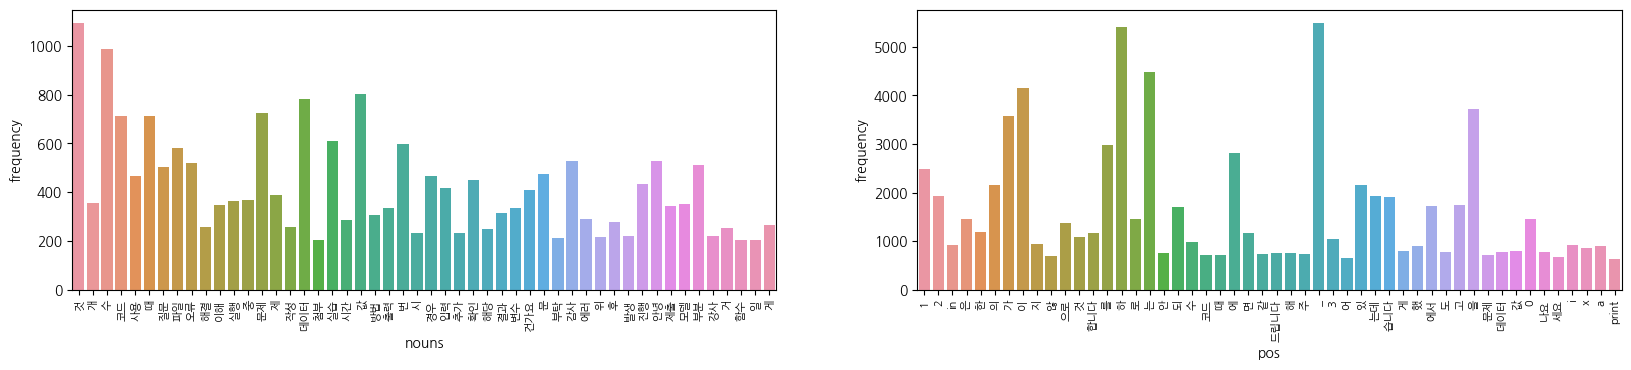

In [43]:
# 각각 Frequency 확인 및 분포 시각화
plt.figure(figsize=(20, 8))

# nouns
plt.subplot(2, 2, 1)
plt.xticks(rotation=90, fontsize=8)
sns.barplot(data=nouns50_df, x='nouns', y='frequency')
plt.xlabel('nouns')
plt.ylabel('frequency')

# pos
plt.subplot(2, 2, 2)
plt.xticks(rotation=90, fontsize=8)
sns.barplot(data=pos50_df, x='pos', y='frequency')
plt.xlabel('pos')
plt.ylabel('frequency')

plt.show()

* 불필요한 단어 제거
* Text( ) 사용

In [44]:
# 불필요한 단어 제거
nouns_stopwords = ['것', '수', '때', '감사', '안녕', '부탁', '건가요']
pos_stopwords = ['_', ]

In [45]:
# Text 사용
nouns_text = Text(retokenize.tokenize(all_nouns))
nouns_text

<Text: 여기 커널 사이즈 은 단어 최대 길이 가정...>

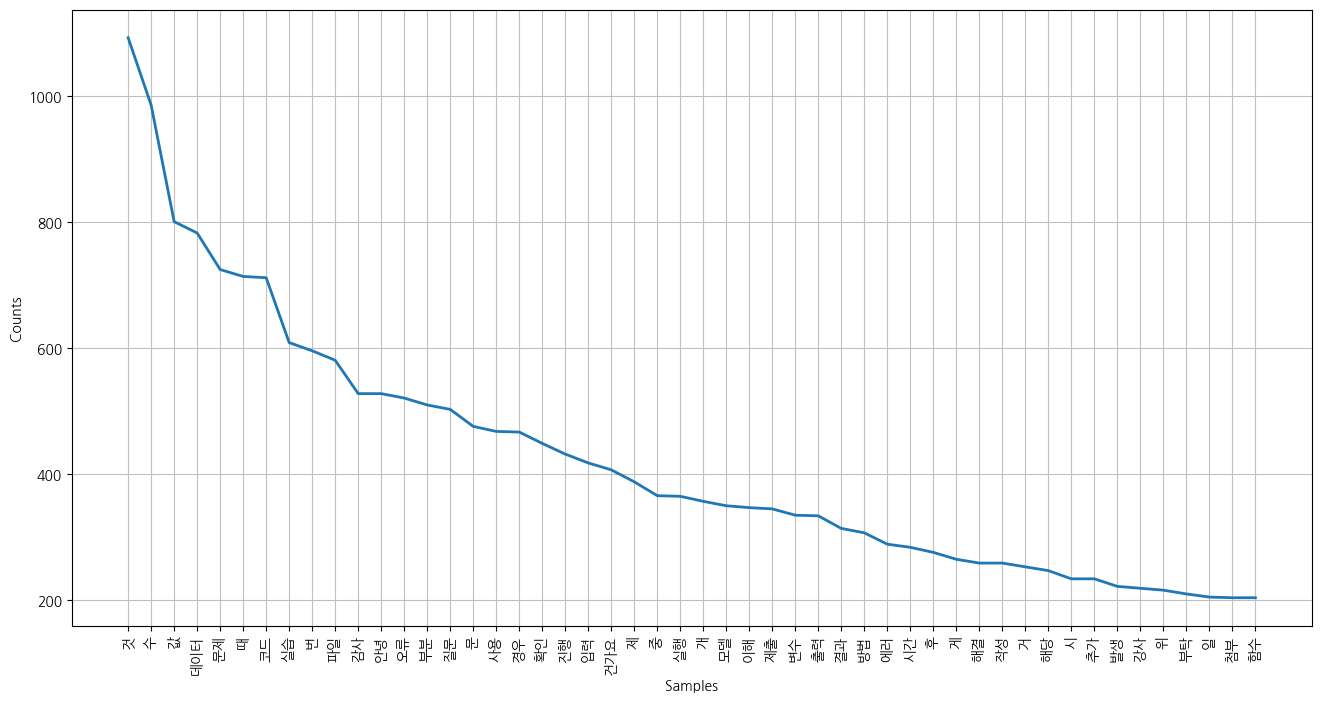

<Axes: xlabel='Samples', ylabel='Counts'>

In [46]:
# 사용 빈도 그래프
plt.figure(figsize=(16, 8))
nouns_text.plot(50)

In [47]:
nouns_text_tmp = [n for n in nouns_text if  n not in nouns_stopwords]
nouns_text2 = FreqDist(nouns_text_tmp)

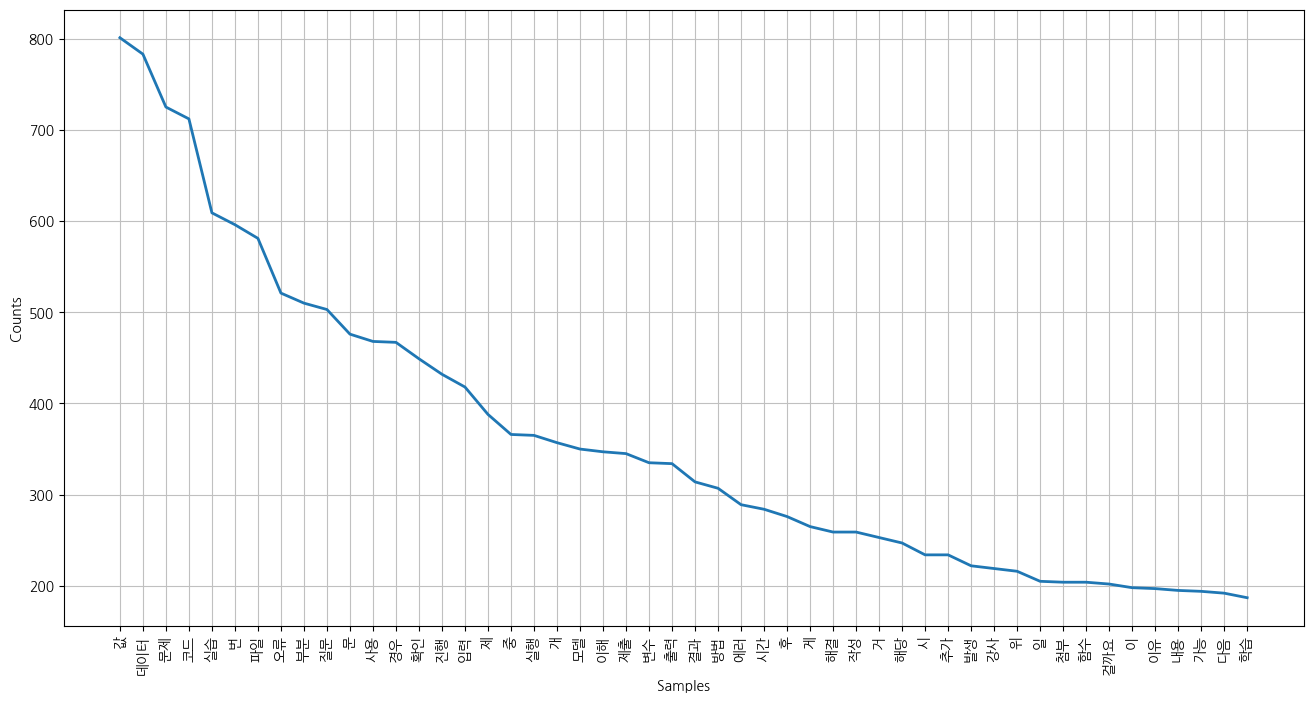

<Axes: xlabel='Samples', ylabel='Counts'>

In [48]:
# 사용 빈도 그래프
plt.figure(figsize=(16, 8))
nouns_text2.plot(50)

* [명사 추출한 데이터에서 코드, 웹, 이론, 원격, 시스템 등 관심있는 각 단어에 분석해보기](https://www.oss.kr/info_techtip/show/73ae868b-c9cd-46b6-9dd8-74ecbf13a3c9)

In [49]:
# 명사 추출한 데이터에서 코드, 웹, 이론, 원격, 시스템 등 관심있는 각 단어에 분석해보기
words = ['실습', '코드', '예제', '오류', '원격', '시스템', '웹']

In [50]:
# .concordance( ) : 텍스트에서 주어진 단어가 쓰인 문맥을 다 찾아줌.
for w in words:
    print(w)
    nouns_text.concordance(w, lines=10)
    print('-' * 150)

실습
Displaying 10 of 609 matches:
치 걸까요 범주 데이터 숫자 데이터 설명 내용 적응 아래 첨부 파일 실습 데이터 서울시 릉 시간 비 데이터 저 데이터 범주 데이터 생각 제 
진행 것 열값 열값 정상 인 스턴스 종료 삭제 인 스턴스 시도 안녕 실습 제출 피드백 부탁 추가 저 노인 복지 관련 문제 정의 특정 기업 분
번 오류 발생 가능 원격 제어 운영 님 원격 문 글 오전 시간 얼마 실습 시간 오후 부팅 동일 증상 문의 감사 강사 화면 타이핑 강사 채팅 
 증가 액 매매 증가 액 식 차트 에러 데이터 프레임 선언 뒤 진행 실습 쿠팡 경우 유통 업 오픈 마켓 분류 수 제 작성 것 유통 업 분류 
산 때 절편 합 회귀 계수 회귀 계수 코드 이미지 부분 의미 건가요 실습 문제 데이터 형태 변경 리셋 기준일 함수 사용 데이터 형태 변경 여
기준일 적용 데이터 무엇 선정 무엇 가치 제안 필요 사항 최종 개별 실습 파일 출시 제 경로 저장 빈파 일 소스 코드 하나 작성 파일 최종 
창 오류 발생 어디 건가요 채점 때 제출 오답 제출 때 케이스 채점 실습 에 중 것 진행 것 안녕 오리 농법 예제 입력 예제 출력 질문 제 
 가능 기한 강의 시청 수 기한 연장 수 문 안녕 튜 터 요새 강의 실습 텐데 찬스 번 문제 달고나 생각 달고나 영역 동일 코드 예제 값 작
터 파일 분석 단위 뭐 수 서울시 공무원 칼럼 그 분류 뒤 이 건가 실습 문제 요일 심야 이동 질문 답 행의 갯 수 카운트 결과 해석 감사 
박 여인 에서 이유 뭘까요 제출 파일 디자인 완료 하나 만 일 오전 실습 내용 목차 개요 일 차 내용 오후 실습 내용 디자인 완료 개 제출 
------------------------------------------------------------------------------------------------------------------------------------------------------
코드
Displaying 10 of 712 ma

* 각각 collocation 확인

In [51]:
# # 각각 collocation 확인
# for w in words:
#     print(w)
#     nouns_text.collocations(window_size=5)
#     print('-' * 150)

* 최소 길이 문의 내용에 대해 grammar pasing 해보기(아래 코드 활용)

In [52]:
# 최소 길이 문의 내용에 대해 grammar pasing 해보기(아래 코드 활용)
grammar = """
NP: {<N.*>*<Suffix>?}   # Noun phrase
VP: {<V.*>*}            # Verb phrase
AP: {<A.*>*}            # Adjective phrase
"""
NP_grammar = "NP: {<Adjective>*<Noun>*}"

In [53]:
!pip install svgling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 KB 9.6 MB/s eta 0:00:00


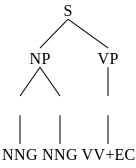

In [54]:
parser_ko = nltk.RegexpParser(grammar)
chunks_ko = parser_ko.parse(mecab_pos[min_len_text])
display(chunks_ko)

### 3-4. Wordcloud 만들기
* 명사 추출/형태소 분석 결과를 이용하여 WordCloud 객체를 생성
* 최대 글꼴 크기(max_font_size), 최대 단어 수(max_words), 배경 색상(background_color)
* 상대 크기비율(relative_scaling), 그림 크기(width, height), 폰트 경로(font_path=FONT_PATH) 등 설정
* .generate 메서드를 연결하여 WordCloud에 사용될 텍스트 데이터 생성
* plt.imshow(  ) 를 통해 화면에 보여집니다.

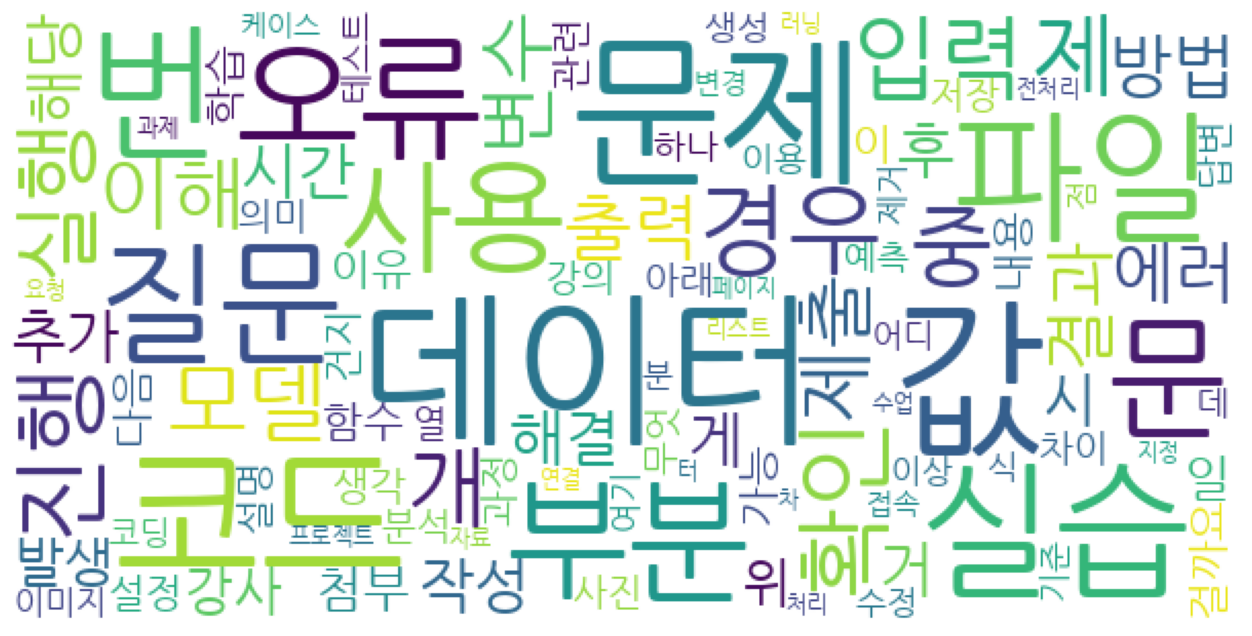

In [55]:
wc = WordCloud(font_path=FONT_PATH,
               max_font_size=80,
               max_words=100,
               background_color='white', 
               relative_scaling=0.5,  
               width=600, height=300)
plt.figure(figsize=(20, 8))
plt.imshow(wc.generate_from_frequencies(nouns_text2))
plt.axis("off")
plt.show()

## 4. 문의 유형에 따른 분석
### 4-1. *3. 데이터 탐색*에서 실행한 알고리즘을 문의 유형에 따라 실행할 수 있는 함수를 개발합니다.
* 아래 text_analysis 함수를 개발합니다.

In [56]:
def text_analysis(df, label=None):
    """
    label에 따라서 분석, label이 None인 경우 전체 분석
    데이터 확인, 데이터 길이 시각화
    명사 추출하여 분석, 워드 클라우드 시각화

    Parameters
    ----------
    df : pandas DataFrame object.
    label : Label for analysis, default=None.
    - If label is None, Entire data are analyzed.

    Returns
    -------
    result : None

    """
    print('-' * 100)
    if label == None:
        text_data = data['text'].reset_index(drop=True)
        df.info()
        print('-' * 50)
        display(data.label.value_counts())
        print('-' * 50)
        norm_label = data.label.value_counts(normalize=True)
        display(norm_label)
        norm_label.plot.bar(figsize=(5, 3))
        plt.show()
    else:
        text_data = data.loc[data['label'] == label, 'text'].reset_index(drop=True)
        display(f'{label}', text_data.head(5))

    # 데이터 길이 시각화
    plt.figure(figsize=(12, 8))

    # 전체 분포 확인
    plt.subplot(2, 2, 1)
    plt.hist([len(s) for s in text_data], bins=100)
    plt.xlabel('Length of text')
    plt.ylabel('Number of texts')

    plt.show()

    # 명사 추출
    all_nouns = ""
    for s in mecab_nouns:
        for n in s:
            all_nouns += n + ' '

    nouns_text = Text(retokenize.tokenize(all_nouns))
    nouns_text_freqdist = FreqDist(nouns_text)

    # 분석
    nouns_text_freqdist.most_common(5)

    # 워드 클라우드 시각화
    wc = WordCloud(font_path=FONT_PATH,
               max_font_size=80,
               max_words=50,
               background_color='white', 
               relative_scaling=0.5,  
               width=600, height=300)
    plt.figure(figsize=(5, 3))
    plt.imshow(wc.generate_from_frequencies(nouns_text_freqdist))
    plt.axis("off")
    plt.show()

### 4-2. 각각의 문의 유형에 대해 실행합니다.

----------------------------------------------------------------------------------------------------


'시스템 운영'

0           한달에 한번 지원금 들어오기로 했는데 국민 내일배움카드로 입금은 언제되나요?
1    안녕하세요 \n\n코딩마스터스 재밌게 하고 있는 에이블러입니다.\n\n코딩마스터스가...
2    금요일에 홈페이지 점검이 있다는 내용을 들었었는데, 금일 접속해 보니 다른 곳은 다...
3    운영자 02님 혹시 원격 기다리실까봐 문의글 남깁니다.\n어차피 오전시간 얼마 안 ...
4    안녕하세요 DX7조입니다.\n제출 버튼에 ppt 파일을 먼저 제출하고 나서 발표영상...
Name: text, dtype: object

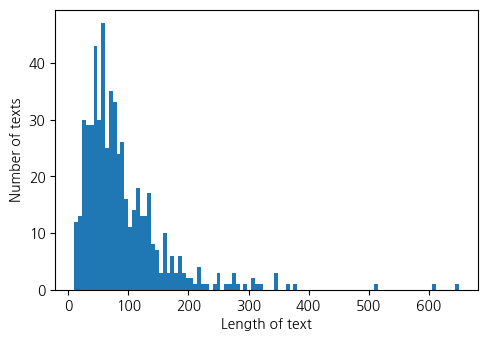

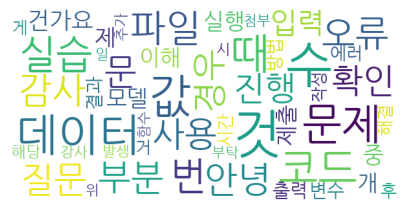

----------------------------------------------------------------------------------------------------


'원격'

0    말씀하신대로 하였으나, 이번에는 이런 오류가 발생합니다.\n\ncannot impo...
1                  어떻게 삭제하는지 모르겠어요 ㅜ 원격지원 부탁드려도 될까요.. 
2    마지막으로 안내해주신 명령어대로 수행해봤는데 역시 에러메시지가 뜹니다 ㅠㅠ\n혹시 ...
3    https://113366.com?accessCode=107144링크로 접속 후 프...
4    네트워크 오류 관련 알려주신 내용 확인해 봤는데 안됩니다,,,, 원격 부탁드려도 되...
Name: text, dtype: object

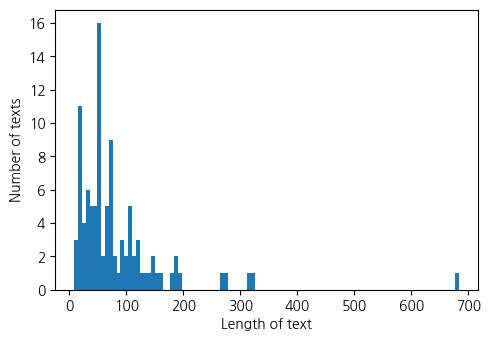

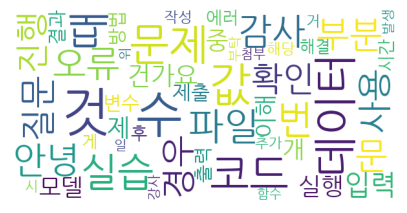

----------------------------------------------------------------------------------------------------


'웹'

0    현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...
1    PDF파일을 보시면 7페이지에 제안사 인프라는 3Tier로 구성(WEB/WAS/DB...
2    다시 쳐보기도 하면 오타 확인했지만 오타는 없었습니다. 그리고 해당 index파일도...
3    윈도우 프롬프트에서 작업중 cd Downloads 이후 퍼블릭 DNS를 연결하면 e...
4    아니면 혹시 인스턴스가 종료되었는데 삭제하기가 보이지가 않아서 새로운 인스턴스를 만...
Name: text, dtype: object

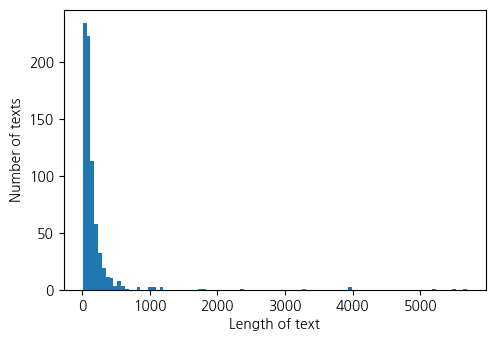

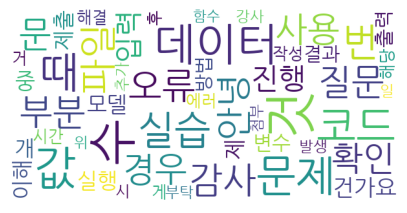

----------------------------------------------------------------------------------------------------


'이론'

0    저는 헬스케어, 그중에서도 정신건강에 대해 관심이 많습니다. 디지털 치료제와 관련한...
1    범주형 데이터와 숫자형 데이터 설명해주신 내용 잘 읽었습니다. 계속 읽고 적응해나아...
2    안녕하세요.\n\n실습1 제출합니다.\n피드백 부탁드립니다.\n\n+) 추가로, 저...
3    아이피 중에 13.13.12.2와 13.13.23.2가 없는데 어떤 것을 연결하는건...
4    backbone은 기본 골자이고, head는 backbone을 바탕으로 목적에 맞게...
Name: text, dtype: object

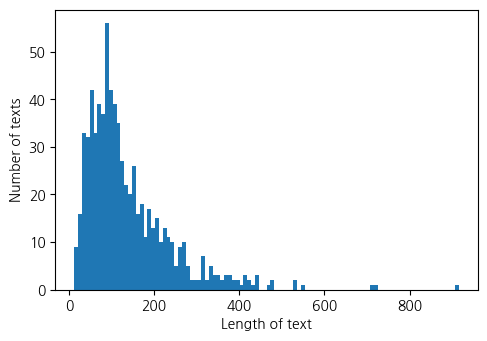

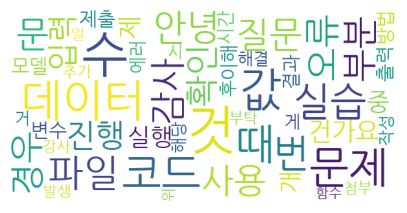

----------------------------------------------------------------------------------------------------


'코드1'

0    첨부파일에 3375.번에 대해 정답인 코드로 돌렸을 시 다 패스가 출력되었지만 문제...
1    앗...제가 질문을 잘못드려서 혼란이 있으셨을 듯 합니다 죄송합니다...ㅠ\n원질문...
2    제가 All Failed를 말씀드린건.. 실행에는 아무문제가 없기 때문입니다...\...
3    안녕하세요! 3436번. 슬라이딩 퍼즐 문제 관련하여 질문드립니다.\n우선 3줄에 ...
4    안녕하세요, 답변에 감사드립니다. 3389 커트라인 정하기 추가 문의 드립니다. \...
Name: text, dtype: object

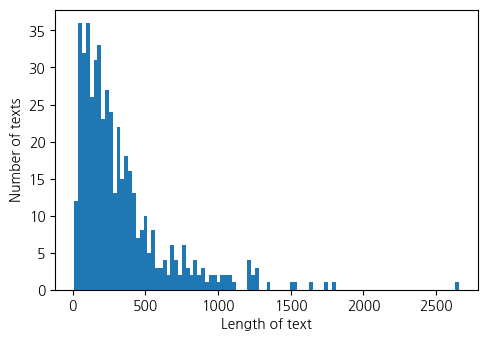

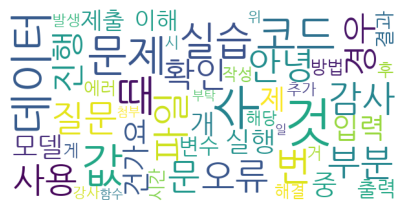

----------------------------------------------------------------------------------------------------


'코드2'

0    self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...
1    glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...
2    tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...
3    filename = TEST_IMAGE + str(round(frame_sec)) ...
4    만약\n각각 결측치가 하나씩 있는 경우를 제외하고\nOzone  열에도 Solar....
Name: text, dtype: object

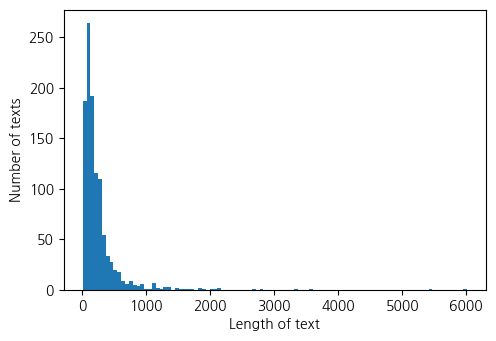

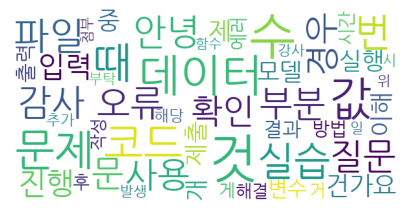

In [57]:
for label in sorted(data.label.unique()):
    text_analysis(data,label)

# 단계2 : 데이터 전처리
> * Tokenization(Konlpy...)
> * Vectorization(N-grams, Sequence)
> * [Google guide](https://developers.google.com/machine-learning/guides/text-classification/step-3)

## 5. 데이터 준비
### 5-1. label 아래 형식으로 처리
```python
label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}
```

In [118]:
label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}
data = data.replace({'label':label_dict})

### 5-2. Train Validation split

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3706 entries, 0 to 3705
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3706 non-null   object
 1   label   3706 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 58.0+ KB


In [120]:
data.head()

,text,label
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",0
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,1
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,0
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",0
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,0


In [121]:
from sklearn.model_selection import train_test_split

In [122]:
train_data, val_data = train_test_split(data, test_size=0.2, random_state=2023)
train_data.reset_index(drop=True, inplace=True)
val_data.reset_index(drop=True, inplace=True)

In [123]:
train_data.shape, val_data.shape

((2964, 2), (742, 2))

In [64]:
train_data.head()

,text,label
0,안녕하세요. :)\n금일 수업 자료 중 [1.2 데이터 불러오기 및 분석(EDA)_...,0
1,'Kernel Panic - not syncing: Attempted to kill...,4
2,답변을 받고 여러번 시도해 보았는데 모든 서브넷 설정이 사진과 같은 상태입니다.\n...,1
3,"요소가 하나인 튜플을 생성할 때, \nex) score = 90, \n이렇게 한다고...",0
4,Q2. 코딩을 작성할 때 첨부 사진처럼 while문을 사용해서 네모칸을 만든 후 주...,0


In [124]:
# 데이터 저장
train_data.to_csv('/content/drive/MyDrive/13 Mini Project04/train_data.csv', index=False)
val_data.to_csv('/content/drive/MyDrive/13 Mini Project04/val_data.csv', index=False)

## 6. 데이터 처리

### 6-1. 특수문자 제거(Optional)
- [정규표현식 이용](https://docs.python.org/3/howto/regex.html)

In [65]:
# train_data['text'] = train_data['text'].str.replace(pat='[^\w]', repl=r'', regex=True)
# pat='[^\w]' : 모든 특수문자
# repl=r'' : 공백으로 대체, 
# repl=r" : 그냥 제거,
# regex=True : 정규표현식 사용 알림

### 6-2. N-grams (sklearn)
> * [scikit-learn working with text data](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html#)
> * [scikit-learn text feature extraction](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)
> * [한글 자료](https://datascienceschool.net/03%20machine%20learning/03.01.03%20Scikit-Learn%EC%9D%98%20%EB%AC%B8%EC%84%9C%20%EC%A0%84%EC%B2%98%EB%A6%AC%20%EA%B8%B0%EB%8A%A5.html)
> * [N-gram](https://wikidocs.net/21692)
> * [N-gram2](https://developers.google.com/machine-learning/guides/text-classification/step-3?hl=ko)

In [106]:
# Tokenizer
train_nouns = [mecab.nouns(s) for s in train_data['text']]
val_nouns = [mecab.nouns(s) for s in val_data['text']]

In [107]:
train_nouns = [' '.join(s) for s in train_nouns]
val_nouns = [' '.join(s) for s in val_nouns]

In [109]:
from sklearn.feature_extraction.text import CountVectorizer

In [110]:
# 벡터화 : 모델이 처리할 수 있는 숫자 벡터로 변환
vect = CountVectorizer()
train_vect = vect.fit(train_nouns)
val_vect = vect.fit(val_nouns)

In [ ]:
train_vect.vocabulary_

In [100]:
len(train_vect.vocabulary_)

1576

In [101]:
ngram_x_train = train_vect.transform(train_data['text'])
ngram_x_val = val_vect.transform(val_data['text'])

In [102]:
ngram_y_train = train_data['label']
ngram_y_val = val_data['label']

In [103]:
ngram_x_train, ngram_x_val

(<2964x1576 sparse matrix of type '<class 'numpy.int64'>'
 	with 7115 stored elements in Compressed Sparse Row format>,
 <742x1576 sparse matrix of type '<class 'numpy.int64'>'
 	with 2025 stored elements in Compressed Sparse Row format>)

In [104]:
ngram_x_train.shape, ngram_x_val.shape

((2964, 1576), (742, 1576))

### 6-3. Sequence (keras, whatever)
> * [keras text classification](https://keras.io/examples/nlp/text_classification_from_scratch/)
> * [tensorflow text classification](https://www.tensorflow.org/tutorials/keras/text_classification)
* tokenizer.fit_on_texts() : 주어진 텍스트 데이터에 대해 단어 사전 생성
* 문장 길이 분포 살펴보기
* 문장 길이를 구해서 기초통계량, histogram, boxplot을 그려보고 적절한 개수를 결정합니다.
* tokenizer.texts_to_sequences() : 주어진 텍스트 데이터를 정수 시퀀스로 변환

* 문장 길이 분포 살펴보기

* 문장 길이를 구해서 기초통계량, histogram, boxplot을 그려보고 적절한 개수를 결정합니다.

In [76]:
# 문장 길이 구하기
train_nouns_tmp = [mecab.nouns(s) for s in train_data['text']]

train_nouns_len = [len(s) for s in train_nouns_tmp]

train_nouns_df = pd.DataFrame()
train_nouns_df['len'] = train_nouns_len

In [77]:
train_nouns_df.describe()

,len
count,2964.000000
mean,15.264170
std,14.217326
min,0.000000
25%,7.000000
50%,11.000000
75%,19.000000
max,196.000000


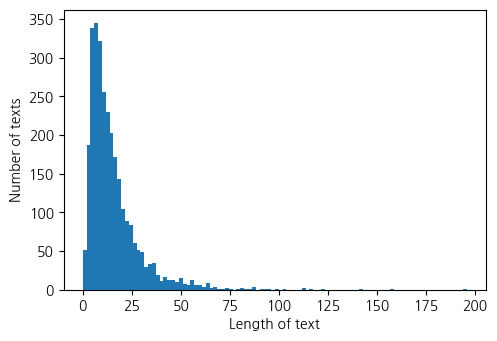

In [78]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(train_nouns_df['len'], bins=100)
plt.xlabel('Length of text')
plt.ylabel('Number of texts')

plt.show()

* tokenizer.fit_on_texts() : 주어진 텍스트 데이터에 대해 단어 사전 생성

In [79]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [80]:
max_words = 2000
tokenizer = Tokenizer(num_words=max_words, lower=False)

In [81]:
tokenizer.fit_on_texts(train_data['text'])

* tokenizer.texts_to_sequences() : 주어진 텍스트 데이터를 정수 시퀀스로 변환

In [82]:
seq_x_train = tokenizer.texts_to_sequences(train_data['text'])
seq_x_val = tokenizer.texts_to_sequences(val_data['text'])

* padding Sequence

In [83]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [84]:
embedding_dim = 128
max_len = 196

In [85]:
seq_x_train = pad_sequences(seq_x_train, maxlen=max_len)  # 문장 길이 통일 
seq_x_val = pad_sequences(seq_x_val, maxlen=max_len)

seq_x_train = np.array(seq_x_train)
seq_x_val = np.array(seq_x_val)

In [86]:
seq_y_train = train_data['label']
seq_y_val = val_data['label']

In [87]:
seq_x_train

array([[   0,    0,    0, ..., 1133,    9,  191],
       [   0,    0,    0, ...,  601,  683,   56],
       [   0,    0,    0, ...,  245, 1930,  135],
       ...,
       [   0,    0,    0, ...,  295,  256,   21],
       [   0,    0,    0, ...,   33,  840,  413],
       [   0,    0,    0, ...,  147,    7,   26]], dtype=int32)

In [88]:
seq_y_train

0       0
1       4
2       1
3       0
4       0
       ..
2959    2
2960    1
2961    1
2962    0
2963    1
Name: label, Length: 2964, dtype: int64

In [89]:
type(seq_y_train)

pandas.core.series.Series

### 6-4. Word2Vec (gensim, optional) 
> * [gensim-word2vec-tutorial](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#sphx-glr-auto-examples-tutorials-run-word2vec-py)
> * [tensorflow-word2vec-tutorial](https://www.tensorflow.org/tutorials/text/word2vec?hl=ko)

In [90]:
# 아래 함수는 제공합니다.
def get_sent_embeddings(model, embedding_size, tokenized_words):

    # 단어 임베딩 및 n_words의 크기가 0인 feature_vec 배열을 0으로 초기화합니다. 
    # 또한 model.wv.index2word를 사용하여 Word2Vec 모델의 어휘에 단어 세트를 생성합니다.
    feature_vec = np.zeros((embedding_size,), dtype='float32')
    n_words = 0
    index2word_set = set(model.wv.index_to_key)

    # 토큰화된 문장의 각 단어를 반복하고 Word2Vec 모델의 어휘에 존재하는지 확인합니다. 
    # 그렇다면 n_words가 증가하고 단어의 임베딩이 feature_vec에 추가됩니다.
    for word in tokenized_words:
        if word in index2word_set:
            n_words += 1
            feature_vec = np.add(feature_vec, model.wv[word])
    
    # Word2Vec 모델의 어휘에 있는 입력 문장에 단어가 있는지 확인합니다. 
    # 있다면 feature_vec를 n_words로 나누어 입력 문장의 평균 임베딩을 구합니다.
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)
        
    return feature_vec
def get_dataset(sentences, model, num_features):

    # 각 문장에 대한 임베딩을 보유할 dataset이라는 빈 목록을 초기화합니다.
    dataset = list()

    # 문장의 각 문장을 반복하고 앞에서 설명한 get_sent_embeddings() 함수를 사용하여 문장에 대한 평균 임베딩을 생성합니다. 
    # 결과 문장 임베딩이 데이터 세트 목록에 추가됩니다.
    for sent in sentences:
        dataset.append(get_sent_embeddings(model, num_features, sent))

    # 루프에서 생성된 문장 임베딩을 sent_embedding_vectors라는 2차원 배열에 쌓습니다. 
    sent_embedding_vectors = np.stack(dataset)
    
    return sent_embedding_vectors

### 6-5. 데이터 저장하기
* N-gram, Sequence로 처리한 데이터 저장
* [sparse data에 대해서는 scipy.sparse.save_npz 활용](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.save_npz.html)

In [91]:
import scipy.sparse

In [105]:
# ngram
scipy.sparse.save_npz('/content/drive/MyDrive/13 Mini Project04/ngram_x_train', ngram_x_train)
ngram_y_train.to_csv('/content/drive/MyDrive/13 Mini Project04/ngram_y_train.csv', index=False)

scipy.sparse.save_npz('/content/drive/MyDrive/13 Mini Project04/ngram_x_val', ngram_x_val)
ngram_y_val.to_csv('/content/drive/MyDrive/13 Mini Project04/ngram_y_val.csv', index=False)

In [93]:
# seq
seq_x_train = pd.DataFrame(seq_x_train)
seq_x_train.to_csv('/content/drive/MyDrive/13 Mini Project04/seq_x_train.csv', index=False)
seq_y_train.to_csv('/content/drive/MyDrive/13 Mini Project04/seq_y_train.csv', index=False)

seq_x_val = pd.DataFrame(seq_x_val)
seq_x_val.to_csv('/content/drive/MyDrive/13 Mini Project04/seq_x_val.csv', index=False)
seq_y_val.to_csv('/content/drive/MyDrive/13 Mini Project04/seq_y_val.csv', index=False)